## For Apple Sillicon

In [1]:
import os
import torch
os.environ["OMP_NUM_THREADS"] = "1"
torch.device("mps")

device(type='mps')

In [2]:
from fastbook import *
from fastai.vision.widgets import *
import timm

In [3]:
img_dir='data/car_data/car_data/train'
path=Path(img_dir)
fns = get_image_files(path)
fns

(#8144) [Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/06796.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/04157.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/00682.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/07660.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/00483.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/06019.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/01212.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/04420.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/01766.jpg'),Path('data/car_data/car_data/train/Dodge Dakota Crew Cab 2010/07260.jpg')...]

## Dataloader

In [4]:
from fastai.vision.core import *
from fastai.vision.data import *

In [5]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

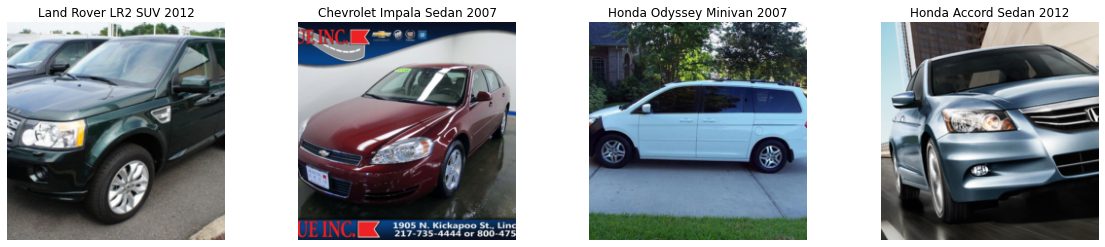

In [6]:
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, figsize=(20, 4))

### Data Augmentation

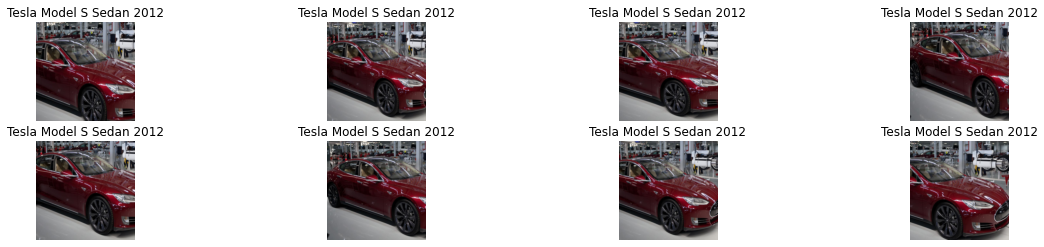

In [7]:
cars = cars.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms)
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True, figsize=(20, 4))

In [8]:
dls.device = torch.device("mps") ## FOR APPLE SILLICON

## Train

In [9]:
timm.list_models('levit*')

['levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384']

In [10]:
learn = vision_learner(dls, resnet34, metrics=(accuracy, error_rate))

/Users/toqi/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/toqi/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.remove_cb(ProgressCallback)
learn.fine_tune(10)

[0, 5.8141961097717285, 3.86344051361084, 0.16523341834545135, 0.8347665667533875, '02:55']
[0, 3.9921066761016846, 3.229968547821045, 0.26474201679229736, 0.7352579832077026, '04:38']
[1, 3.2791640758514404, 2.4702155590057373, 0.4004913866519928, 0.5995085835456848, '04:34']
[2, 2.427299976348877, 1.8984369039535522, 0.5153562426567078, 0.48464372754096985, '04:43']
[3, 1.7053773403167725, 1.5297985076904297, 0.5927518606185913, 0.4072481691837311, '04:42']
[4, 1.2130926847457886, 1.2686809301376343, 0.6615478992462158, 0.3384521007537842, '05:02']
[5, 0.8220500946044922, 1.1573858261108398, 0.6928746700286865, 0.3071253001689911, '04:41']
[6, 0.5634341239929199, 1.056827187538147, 0.7088451981544495, 0.29115480184555054, '04:32']
[7, 0.4004710912704468, 1.0036393404006958, 0.7229729890823364, 0.27702704071998596, '04:27']
[8, 0.311097651720047, 0.9766703248023987, 0.7340294718742371, 0.26597052812576294, '05:09']
[9, 0.27754056453704834, 0.969034731388092, 0.7352579832077026, 0.2647

### Export Model

In [12]:
learn.export('model.pkl')

## Inference

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [14]:
interp.print_classification_report()

                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       1.00      1.00      1.00         6
                             Acura Integra Type R 2001       0.70      1.00      0.82         7
                                   Acura RL Sedan 2012       0.67      0.50      0.57         4
                                   Acura TL Sedan 2012       0.88      0.78      0.82         9
                                  Acura TL Type-S 2008       0.75      0.60      0.67         5
                                  Acura TSX Sedan 2012       0.40      0.67      0.50         3
                              Acura ZDX Hatchback 2012       0.75      0.75      0.75         4
              Aston Martin V8 Vantage Convertible 2012       0.50      0.42      0.45        12
                    Aston Martin V8 Vantage Coupe 2012       0.50      0.43      0.46         7
                  Aston Martin Virage C

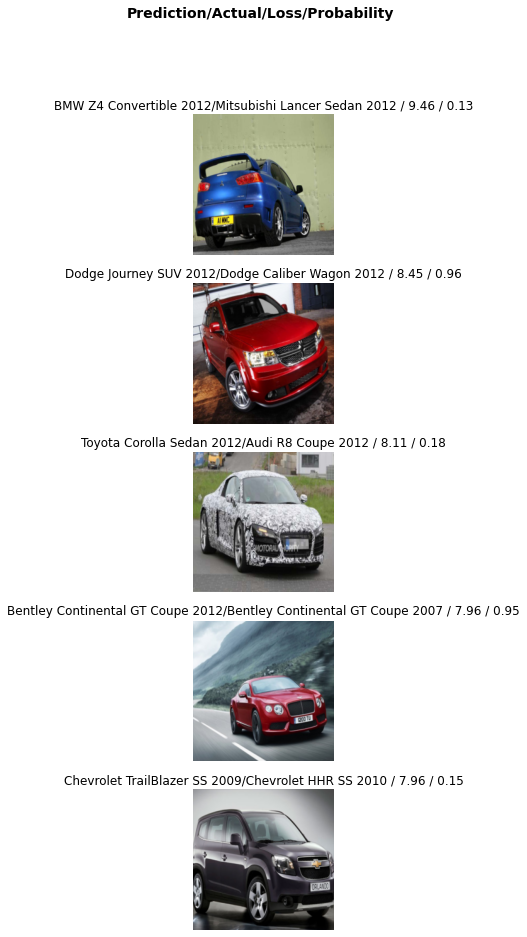

In [15]:
interp.plot_top_losses(5, nrows=5)

## Test

In [10]:
test_img_dir='data/car_data/car_data/test'
test_path=Path(test_img_dir)
test_fns = get_image_files(test_path)
test_fns

(#8041) [Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/00318.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/03773.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/01206.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/08018.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/05448.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/01809.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/03428.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/06234.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/00678.jpg'),Path('data/car_data/car_data/test/Dodge Dakota Crew Cab 2010/07004.jpg')...]

In [17]:
test_cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y=parent_label,
    item_tfms=Resize(224))

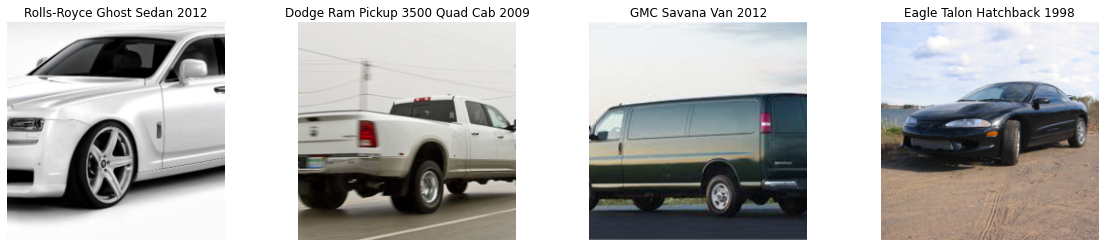

In [18]:
test_dls = test_cars.dataloaders(test_path)
test_dls.valid.show_batch(max_n=4, nrows=1, figsize=(20, 4))

In [20]:
test_dls.device = torch.device("mps") ## FOR APPLE SILLICON

In [9]:
learn = load_learner('model.pkl')

In [12]:
tst_dl = dls.test_dl(test_fns)

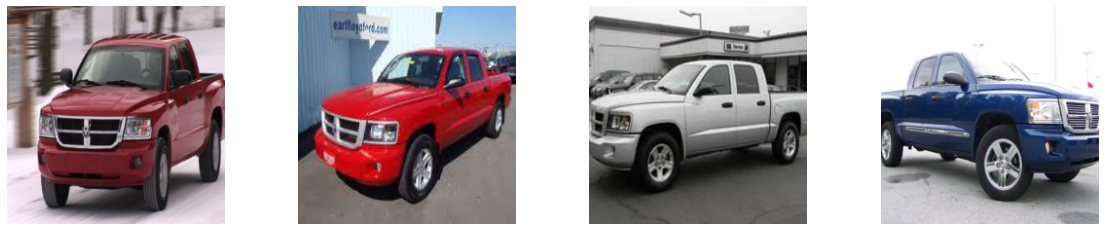

In [15]:
tst_dl.show_batch(max_n=4, nrows=1, figsize=(20, 4))